In [22]:
### Hayden Gallo 
### Bucci Lab
### 6/26/24
### Analyzing Cobratoolbox/Agora2 Output

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
# Set working directory to output directory of cobratoolbox 

directory  = '/Users/haydengallo/Documents/Bucci_Lab/cobra_analysis_Donatello/'
#os.chdir('/lacie_donatello/hgallo/cobra_analysis/')
os.chdir('/Users/haydengallo/Documents/Bucci_Lab/cobra_analysis_Donatello/AMANHI_P')
print(os.getcwd())

/Users/haydengallo/Documents/Bucci_Lab/cobra_analysis_Donatello/AMANHI_P


In [55]:
# Loading in statistical output of cobratoolbox

sec_flux_sig = pd.read_csv('./Statistics/inputDiet_net_secretion_fluxes_Group_SignificantFeatures.txt', sep ="\t")
upt_flux_sig = pd.read_csv('./Statistics/inputDiet_net_uptake_fluxes_Group_SignificantFeatures.txt', sep="\t")
sub_sys_abun_sig = pd.read_csv('./Statistics/SubsystemAbundance_Group_SignificantFeatures.txt', sep ='\t')
rxn_pres_sig = pd.read_csv('./Statistics/ReactionPresence_Group_SignificantFeatures.txt', sep = '\t')
rxn_abun_sig = pd.read_csv('./Statistics/ReactionAbundance_Group_SignificantFeatures.txt', sep='\t')
microbe_sec_sig = pd.read_csv('./Statistics/Microbe_Secretion_Group_SignificantFeatures.txt', sep='\t')
microbe_up_sig = pd.read_csv('./Statistics/Microbe_Uptake_Group_SignificantFeatures.txt', sep='\t')
microbe_flux_sig = pd.read_csv('./Statistics/Microbe_Flux_Spans_Group_SignificantFeatures.txt', sep = '\t')
microbe_sec = pd.read_csv('./Statistics/Microbe_Flux_Spans_Group_Statistics.txt', sep = '\t')


# getting significant data from high fiber sims

microbe_sec_sig_high_fib = pd.read_csv('./HighFiber_sims/Statistics/Microbe_Secretion_Group_SignificantFeatures.txt', sep='\t')
microbe_up_sig_high_fib = pd.read_csv('./HighFiber_sims/Statistics/Microbe_Uptake_Group_SignificantFeatures.txt', sep='\t')
microbe_flux_sig_high_fib = pd.read_csv('./HighFiber_sims/Statistics/Microbe_Flux_Spans_Group_SignificantFeatures.txt', sep = '\t')





In [25]:
# Load in taxonomy

AMANHI_P_tax = pd.read_csv('Taxonomy_AMANHI_P.csv')

AMANHI_P_concat_species_level = pd.read_csv('AMANHI_P_concat_species_level.csv', index_col=0)
#AMANHI_P_concat_species_level = pd.read_csv('agora_term_preterm_data/AMANHI_P_concat_species_level.csv', index_col=0)

# Load sample stratification info 

AMANHI_P_sampinfo = pd.read_csv('sampInfo_AMANHI_P.csv', index_col=0)


## Load in abundance 

norm_abundance = pd.read_csv('normalizedCoverage.csv', index_col=0)

# Filtering 

In [26]:
AMANHI_P_tax.head()

AMANHI_P_tax.loc[AMANHI_P_tax['Genus'] == 'Bacteroides']
### need to filter this list by first those present in cobra analysis 
### then should filter by either class "clostridia" or order "Clostridiales"

Kingdom         Phylum        Class          Order          Family  \
9    Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   
37   Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   
38   Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   
44   Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   
71   Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   
76   Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   
80   Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   
82   Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   
90   Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   
103  Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   
125  Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   
130  Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   
176  Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   
186  Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   
188  Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae   

           Genus                    Species  
9    Bacteroides     Bacteroides_sp_CAG_770  
37   Bacteroides      Bacteroides_stercoris  
38   Bacteroides     Bacteroides_sp_CAG_709  
44   Bacteroides       Bacteroides_plebeius  
71   Bacteroides         Bacteroides_caccae  
76   Bacteroides      Bacteroides_uniformis  
80   Bacteroides       Bacteroides_vulgatus  
82   Bacteroides  Bacteroides_xylanisolvens  
90   Bacteroides         Bacteroides_ovatus  
103  Bacteroides     Bacteroides_sp_CAG_545  
125  Bacteroides       Bacteroides_fragilis  
130  Bacteroides     Bacteroides_sp_CAG_530  
176  Bacteroides      Bacteroides_coprocola  
186  Bacteroides          Bacteroides_dorei  
188  Bacteroides    Bacteroides_sp_CAG_1060

In [27]:
name_filter =[]
for i in range(0, len(AMANHI_P_concat_species_level)):
    name_filter.append(AMANHI_P_concat_species_level.index[i][3:])

In [28]:
tax_filter = AMANHI_P_tax.set_index('Species').loc[name_filter,:].reset_index()
tax_filter.loc[tax_filter['Class'] == 'Clostridia']

Species   Kingdom      Phylum       Class  \
5   Faecalibacterium_prausnitzii  Bacteria  Firmicutes  Clostridia   
6              Dorea_longicatena  Bacteria  Firmicutes  Clostridia   
7            Eubacterium_rectale  Bacteria  Firmicutes  Clostridia   
8           Ruminococcus_torques  Bacteria  Firmicutes  Clostridia   
11           Ruminococcus_bromii  Bacteria  Firmicutes  Clostridia   
13             Coprococcus_comes  Bacteria  Firmicutes  Clostridia   
16         Dorea_formicigenerans  Bacteria  Firmicutes  Clostridia   
17            Eubacterium_hallii  Bacteria  Firmicutes  Clostridia   
19              Roseburia_faecis  Bacteria  Firmicutes  Clostridia   
20       Roseburia_inulinivorans  Bacteria  Firmicutes  Clostridia   
22          Coprococcus_eutactus  Bacteria  Firmicutes  Clostridia   
24        Clostridium_ventriculi  Bacteria  Firmicutes  Clostridia   

            Order           Family                         Genus  
5   Clostridiales  Ruminococcaceae              Faecalibacterium  
6   Clostridiales  Lachnospiraceae                         Dorea  
7   Clostridiales  Lachnospiraceae  Lachnospiraceae_unclassified  
8   Clostridiales  Lachnospiraceae                       Blautia  
11  Clostridiales  Ruminococcaceae                  Ruminococcus  
13  Clostridiales  Lachnospiraceae                   Coprococcus  
16  Clostridiales  Lachnospiraceae                         Dorea  
17  Clostridiales   Eubacteriaceae                   Eubacterium  
19  Clostridiales  Lachnospiraceae                     Roseburia  
20  Clostridiales  Lachnospiraceae                     Roseburia  
22  Clostridiales  Lachnospiraceae                   Coprococcus  
24  Clostridiales   Clostridiaceae                   Clostridium

In [29]:
# filter by bugs with high butyrate secretion 

for i in range(0, len(microbe_sec_sig)):
    if (microbe_sec_sig['Averages'][i].split('_')[2]) == 'but':
        print(microbe_sec_sig['Averages'][i])

# from this we can see that F. prausnitzii, E. hallii, and R. faecis all secrete sig amounts of butyrate and are of all of the class Clostridia 

Faecalibacterium_prausnitzii_but
Eubacterium_hallii_but
Roseburia_faecis_but
Catenibacterium_mitsuokai_but


In [30]:
## Now investigate if there are overlaps between what B. theta and P. copri significantly secrete and what the 3 identified butryate producers significantly uptake

#microbe_sec_sig.head(40)

# filter uptake file by the 3 Clostridia mentioned
index_to_filter_up =[]
microbe_up_sig.head()
for i in range(0, len(microbe_up_sig)):
    if (microbe_up_sig['Averages'][i].split('_')[1]) == 'prausnitzii' or (microbe_up_sig['Averages'][i].split('_')[1]) == 'hallii' or (microbe_up_sig['Averages'][i].split('_')[1]) == 'faecis':
        index_to_filter_up.append(microbe_up_sig.index[i])

microbe_up_sig_filtered = microbe_up_sig.iloc[index_to_filter_up].reset_index(drop=True)

In [31]:
# make this a list comp
# using this to split and filter by pertinent metabolites

sig_metabolites = []

for i in range(0, len(microbe_up_sig_filtered)):
    sig_metabolites.append(microbe_up_sig_filtered['Averages'][i].split('_', 2)[2]) 

sig_metabolites



['26dap_M',
 '3mop',
 '7a_czp',
 'Lcystin',
 'ac',
 'acald',
 'acgam',
 'ala_L',
 'anzp',
 'arg_L',
 'asn_L',
 'btn',
 'ca2',
 'chlphncl',
 'cl',
 'co2',
 'cobalt2',
 'cu2',
 'cys_L',
 'czp',
 'etoh',
 'fe2',
 'fe3',
 'fol',
 'for',
 'fru',
 'fum',
 'glc_D',
 'gln_L',
 'glu_L',
 'gly',
 'glyc',
 'gua',
 'h2o',
 'h',
 'his_L',
 'ile_L',
 'ins',
 'k',
 'lac_D',
 'leu_L',
 'lys_L',
 'malt',
 'met_L',
 'mg2',
 'mn2',
 'mqn8',
 'na1',
 'nac',
 'nchlphncl',
 'nh4',
 'nzp',
 'ocdca',
 'phe_L',
 'pi',
 'pnto_R',
 'pro_L',
 'ptrc',
 'pydx',
 'pyr',
 'q8',
 'ribflv',
 'ser_L',
 'so4',
 'spmd',
 'succ',
 'sucr',
 'thm',
 'thymd',
 'trp_L',
 'tyr_L',
 'val_L',
 'xan',
 'zn2',
 '12dhchol',
 '12ppd_S',
 '7a_czp',
 'ac',
 'ala_L',
 'anzp',
 'asn_L',
 'btn',
 'ca2',
 'cgly',
 'chlphncl',
 'cholate',
 'cl',
 'co2',
 'cobalt2',
 'cu2',
 'czp',
 'dgchol',
 'fe2',
 'fe3',
 'for',
 'fru',
 'gal',
 'gchola',
 'glc_D',
 'glu_L',
 'glyc',
 'glyleu',
 'glymet',
 'glypro',
 'h2o',
 'h',
 'his_L',
 'hxan',
 'ile

In [32]:
# first 52 rows are prevotella_copri sig secretion


microbe_sec_sig_p_copri = microbe_sec_sig.iloc[:59, :]
microbe_sec_sig_p_copri.shape

(59, 109)

In [33]:
index_to_keep = []

for i in range(0, len(microbe_sec_sig_p_copri)):
    if (sig_metabolites.count(microbe_sec_sig_p_copri['Averages'][i].split('_', 2)[2])) != 0:
        index_to_keep.append(i)

microbe_sec_sig_p_copri.iloc[index_to_keep,:].reset_index(drop = True)


index_to_keep


[0,
 1,
 2,
 4,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 15,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 46,
 47,
 48,
 49,
 50,
 51,
 53,
 54,
 55,
 57,
 58]

In [34]:
### plotting F. prau abundance vs P. copri secrtion of L-asparagine stratified by preterm and term


p_copri_asn_l = pd.DataFrame(microbe_sec_sig_p_copri.set_index('Averages').loc['Prevotella_copri_asn_L',:])


### Merge all potential 

p_copri_meta = microbe_sec_sig_p_copri.set_index('Averages').transpose()


### Pull abundances of butyrate producers 

butyrate_producers = ['panFaecalibacterium_prausnitzii', 'panRoseburia_faecis', 'panEubacterium_hallii']

### df with butyrate producer abundances and subject as index

butryate_producers_ab_df = norm_abundance.loc[butyrate_producers,:].transpose()




In [35]:
f_brau_but_sec = pd.DataFrame(microbe_sec_sig.set_index('Averages').loc['Faecalibacterium_prausnitzii_but',])

f_brau_but_sec

Faecalibacterium_prausnitzii_but
X17FM0048401                           -8.2104
X17FM0050301                          -13.7176
X17FM0050501                          -30.0972
X17FM0052701                          -28.3160
X17FM0057101                           -8.3592
...                                        ...
X17FM0210701                          -36.5512
X17FM0212701                          -52.8520
X17FM0213901                          -22.4556
X17FM0218301                          -13.1784
X17FM0219901                          -39.2976

[108 rows x 1 columns]

In [36]:
### mergeing samp info and metabolite secretion for l-asparagine  info 

p_copri_asn_l_df = pd.merge(p_copri_asn_l, AMANHI_P_sampinfo, left_index=True, right_index=True)

# merging all metabolites and samp info then merged with butyrate producer abundance info

p_copri_samp_df = pd.merge(p_copri_meta, AMANHI_P_sampinfo, left_index=True, right_index=True)
p_copri_meta_butyrate_producers = pd.merge(p_copri_samp_df, butryate_producers_ab_df, left_index=True, right_index=True)


'''
for i in range(0, 59):
    print(p_copri_meta_butyrate_producers.columns[i])
    print('F_prau', np.corrcoef(np.abs(p_copri_meta_butyrate_producers.iloc[:,i]), p_copri_meta_butyrate_producers.iloc[:,60])[1,0])
    print('R_faecis', np.corrcoef(np.abs(p_copri_meta_butyrate_producers.iloc[:,i]), p_copri_meta_butyrate_producers.iloc[:,61])[1,0])
    print('E_hallii', np.corrcoef(np.abs(p_copri_meta_butyrate_producers.iloc[:,i]), p_copri_meta_butyrate_producers.iloc[:,62])[1,0])
    sns.scatterplot(data=p_copri_meta_butyrate_producers, x = np.abs(p_copri_meta_butyrate_producers.iloc[:,i]), y = p_copri_meta_butyrate_producers.iloc[:,60], hue ='Group')
    plt.show()

p_copri_meta_butyrate_producers.head()

'''

microbe_sec_sig.head(50)




Averages  X17FM0048401  X17FM0050301  X17FM0050501  \
0     Prevotella_copri_26dap_M   -161.348300     -0.481730   -118.146600   
1      Prevotella_copri_7a_czp    -30.919300     -0.481800    -94.289700   
2          Prevotella_copri_ac   -161.372000     -0.481800   -118.164000   
3         Prevotella_copri_adn    -88.082400     -0.481800   -109.521900   
4       Prevotella_copri_ala_L   -161.114300     -0.481030   -117.975300   
5        Prevotella_copri_anzp    -30.919300     -0.481800    -94.289700   
6       Prevotella_copri_asn_L   -161.372000     -0.481800   -118.164000   
7       Prevotella_copri_asp_L   -161.372000     -0.481800   -118.164000   
8         Prevotella_copri_ca2      0.002200      0.000007      0.001611   
9    Prevotella_copri_chlphncl    -30.919300     -0.481800    -94.289700   
10         Prevotella_copri_cl      0.002200      0.000007      0.001611   
11        Prevotella_copri_co2   -161.372000     -0.481800   -118.164000   
12    Prevotella_copri_cobalt2      0.002200      0.000007      0.001611   
13        Prevotella_copri_cu2      0.002200      0.000007      0.001611   
14       Prevotella_copri_cytd    -94.160800     -0.481400    -83.657400   
15        Prevotella_copri_czp    -30.919300     -0.481800    -94.289700   
16      Prevotella_copri_dad_2    -83.840900     -0.481800   -102.970500   
17       Prevotella_copri_dcyt   -161.372000     -0.481800   -118.164000   
18        Prevotella_copri_fe2      0.002824      0.000008      0.002068   
19        Prevotella_copri_fe3      0.002200      0.000007      0.001611   
20        Prevotella_copri_fol    -45.147300     -0.228360    -39.928500   
21        Prevotella_copri_for   -161.372000     -0.481800   -118.164000   
22      Prevotella_copri_glu_L   -161.372000     -0.481800   -118.164000   
23        Prevotella_copri_gly   -161.372000     -0.481800   -118.164000   
24       Prevotella_copri_glyc     -0.006444     -0.000019     -0.004718   
25        Prevotella_copri_gsn    -80.791400     -0.481800    -90.040700   
26        Prevotella_copri_h2o   -161.372000     -0.481800   -118.164000   
27          Prevotella_copri_h   -161.372000     -0.481800   -118.164000   
28      Prevotella_copri_his_L    -94.874300     -0.343550    -75.838100   
29      Prevotella_copri_ile_L   -161.249000     -0.481430   -118.074000   
30        Prevotella_copri_ins   -104.076000     -0.481780   -118.037400   
31          Prevotella_copri_k      0.002200      0.000007      0.001611   
32      Prevotella_copri_leu_L   -161.190600     -0.481260   -118.031200   
33      Prevotella_copri_lys_L   -161.247100     -0.481430   -118.072600   
34      Prevotella_copri_met_L   -122.135000     -0.481510   -118.092900   
35        Prevotella_copri_mg2      0.002200      0.000007      0.001611   
36        Prevotella_copri_mn2      0.002200      0.000007      0.001611   
37       Prevotella_copri_mqn8    -12.967900     -0.060124    -11.453600   
38        Prevotella_copri_nac    -55.103400     -0.481370    -88.273800   
39  Prevotella_copri_nchlphncl    -30.919300     -0.481800    -94.289700   
40        Prevotella_copri_nh4   -161.372000     -0.481800   -118.164000   
41        Prevotella_copri_nzp    -30.919300     -0.481800    -94.289700   
42      Prevotella_copri_phe_L   -161.304400     -0.481600   -118.114500   
43      Prevotella_copri_pheme      0.000625      0.000002      0.000457   
44         Prevotella_copri_pi      0.460470      0.001375      0.337180   
45        Prevotella_copri_ppa   -161.372000     -0.481800   -118.164000   
46      Prevotella_copri_pro_L   -161.291400     -0.481560   -118.105000   
47         Prevotella_copri_q8      0.000625      0.000002      0.000457   
48     Prevotella_copri_ribflv    -49.504300     -0.240680    -51.975000   
49      Prevotella_copri_ser_L   -161.372000     -0.481800   -118.164000   

    X17FM0052701  X17FM0057101  X17FM0063201  X17FM0063301  X17FM0064301  \
0    -148.826100    -13.683200   -171.506800           0.0    -38.092

<>:45: SyntaxWarning: invalid escape sequence '\R'
<>:69: SyntaxWarning: invalid escape sequence '\E'
<>:45: SyntaxWarning: invalid escape sequence '\R'
<>:69: SyntaxWarning: invalid escape sequence '\E'
/var/folders/5n/y6k0c8y951n38r8ccc6trh1m0000gn/T/ipykernel_4752/1729337344.py:45: SyntaxWarning: invalid escape sequence '\R'
  axes[i].set_title(f"{column_name}\R_faecis_corr: {R_faecis_corr:.2f}")
/var/folders/5n/y6k0c8y951n38r8ccc6trh1m0000gn/T/ipykernel_4752/1729337344.py:69: SyntaxWarning: invalid escape sequence '\E'
  axes[i].set_title(f"{column_name}\E_hallii_corr: {E_hallii_corr:.2f}")


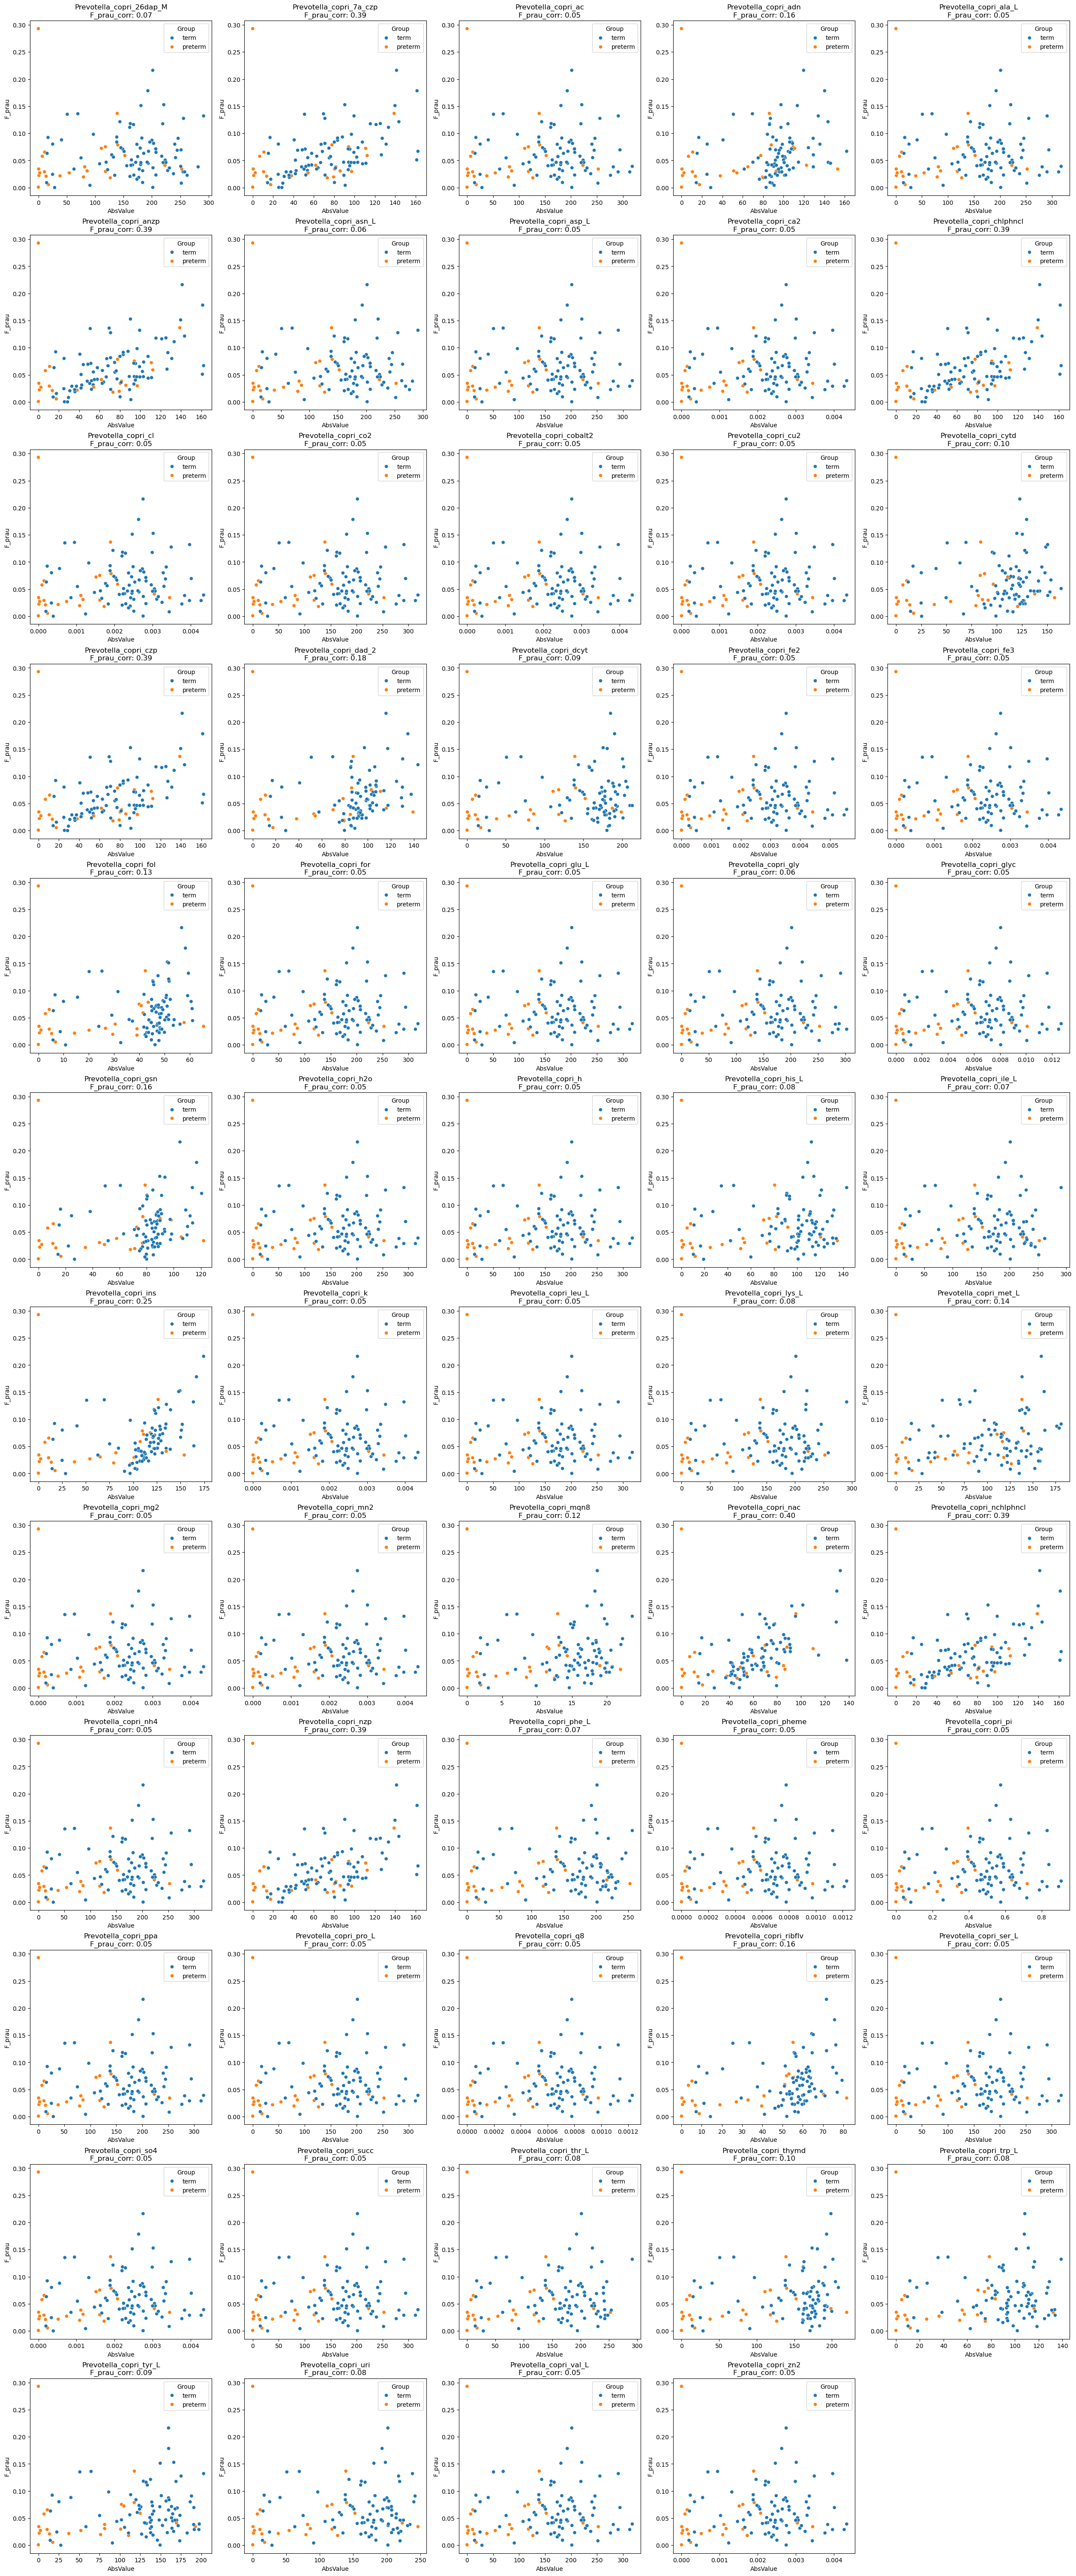

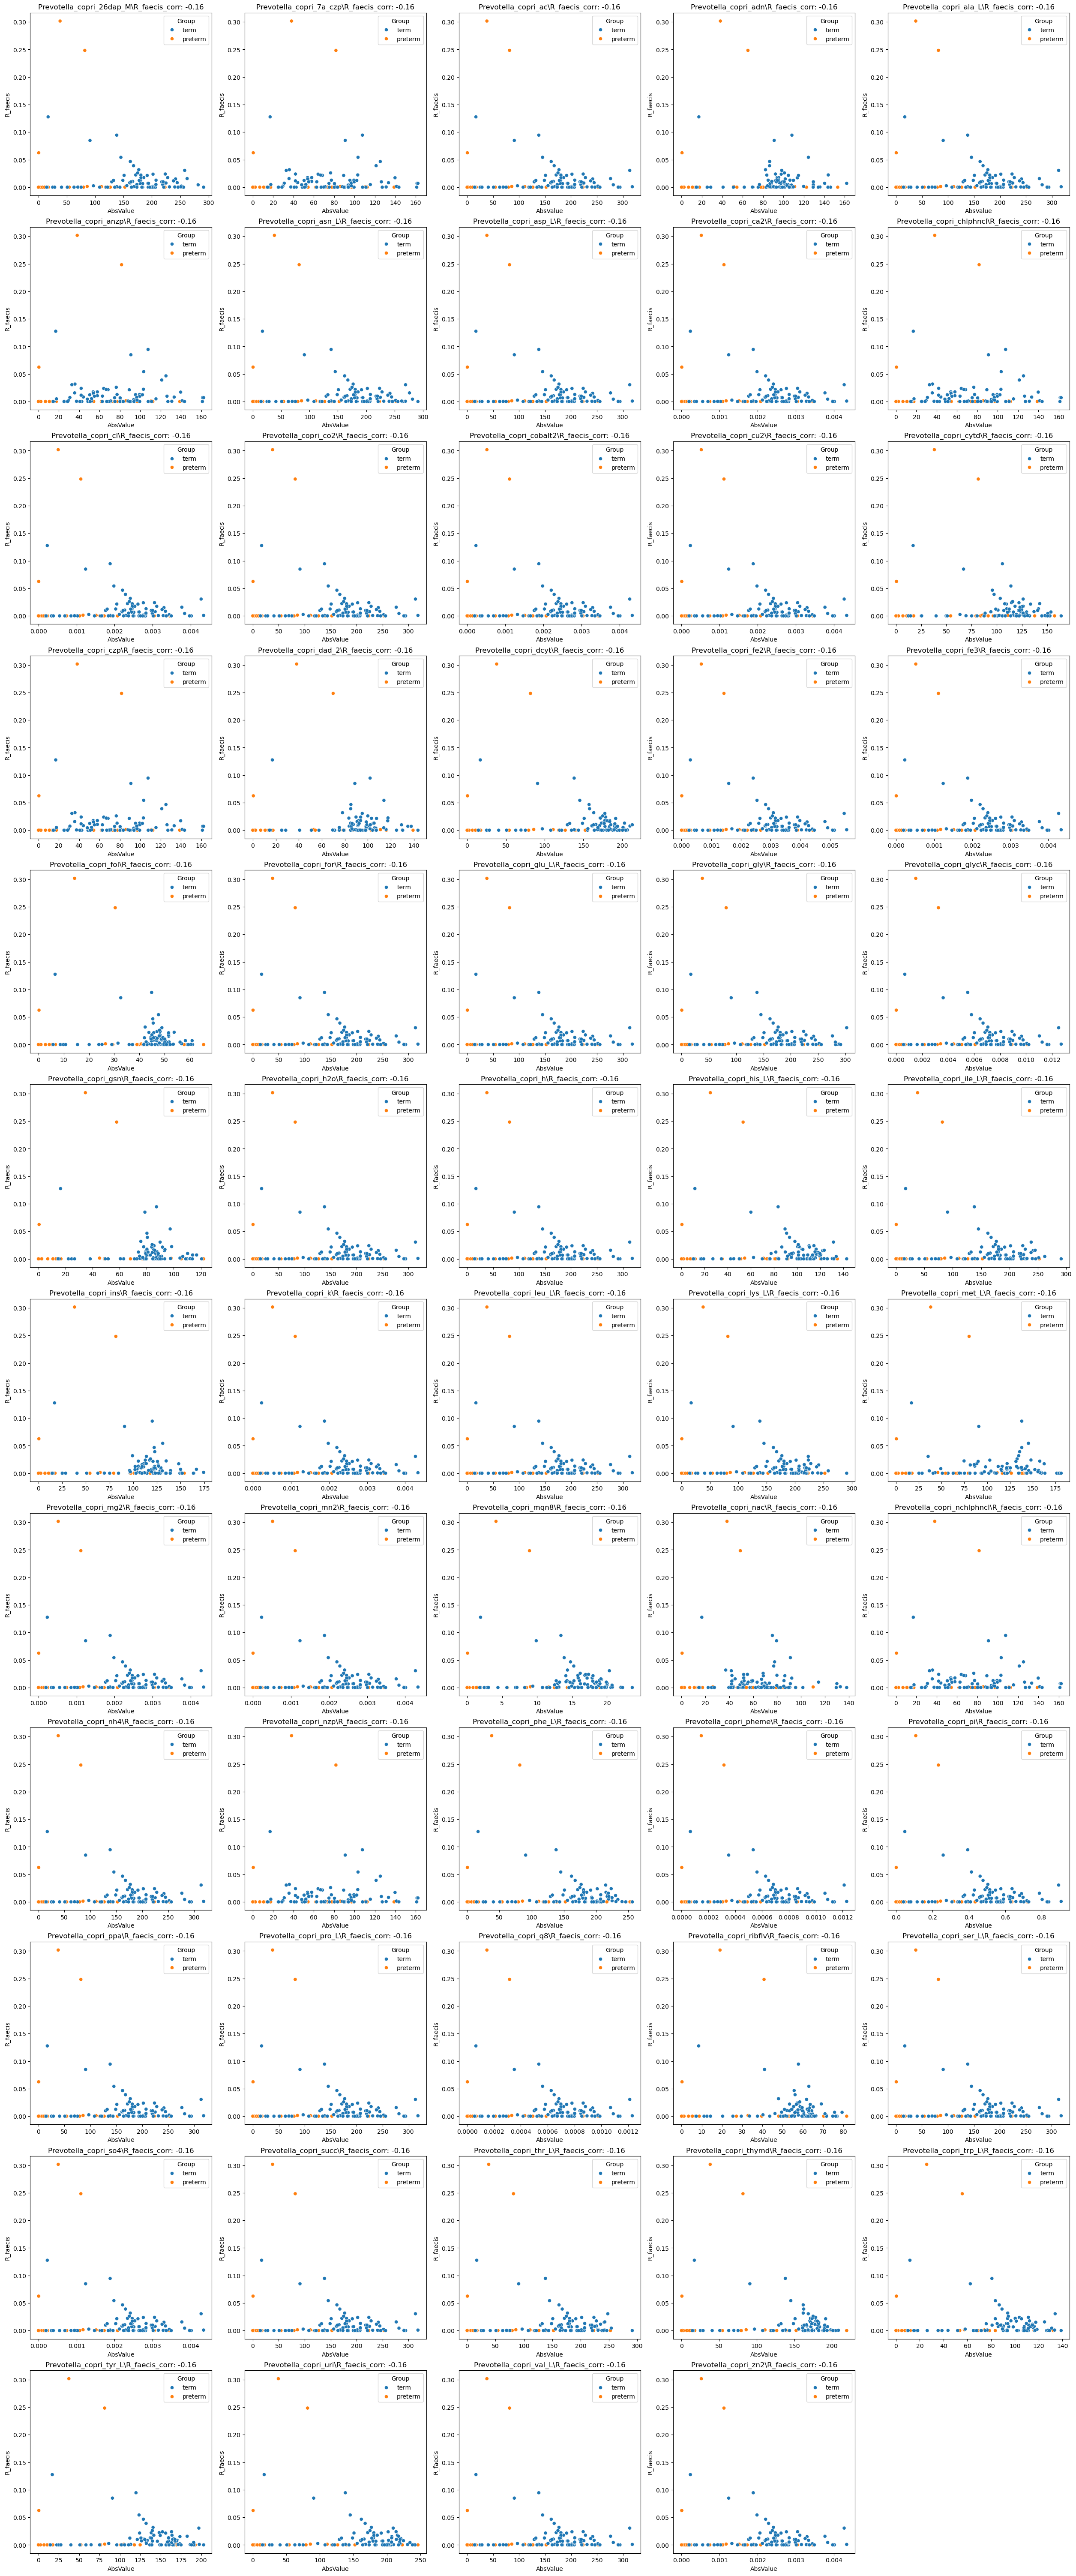

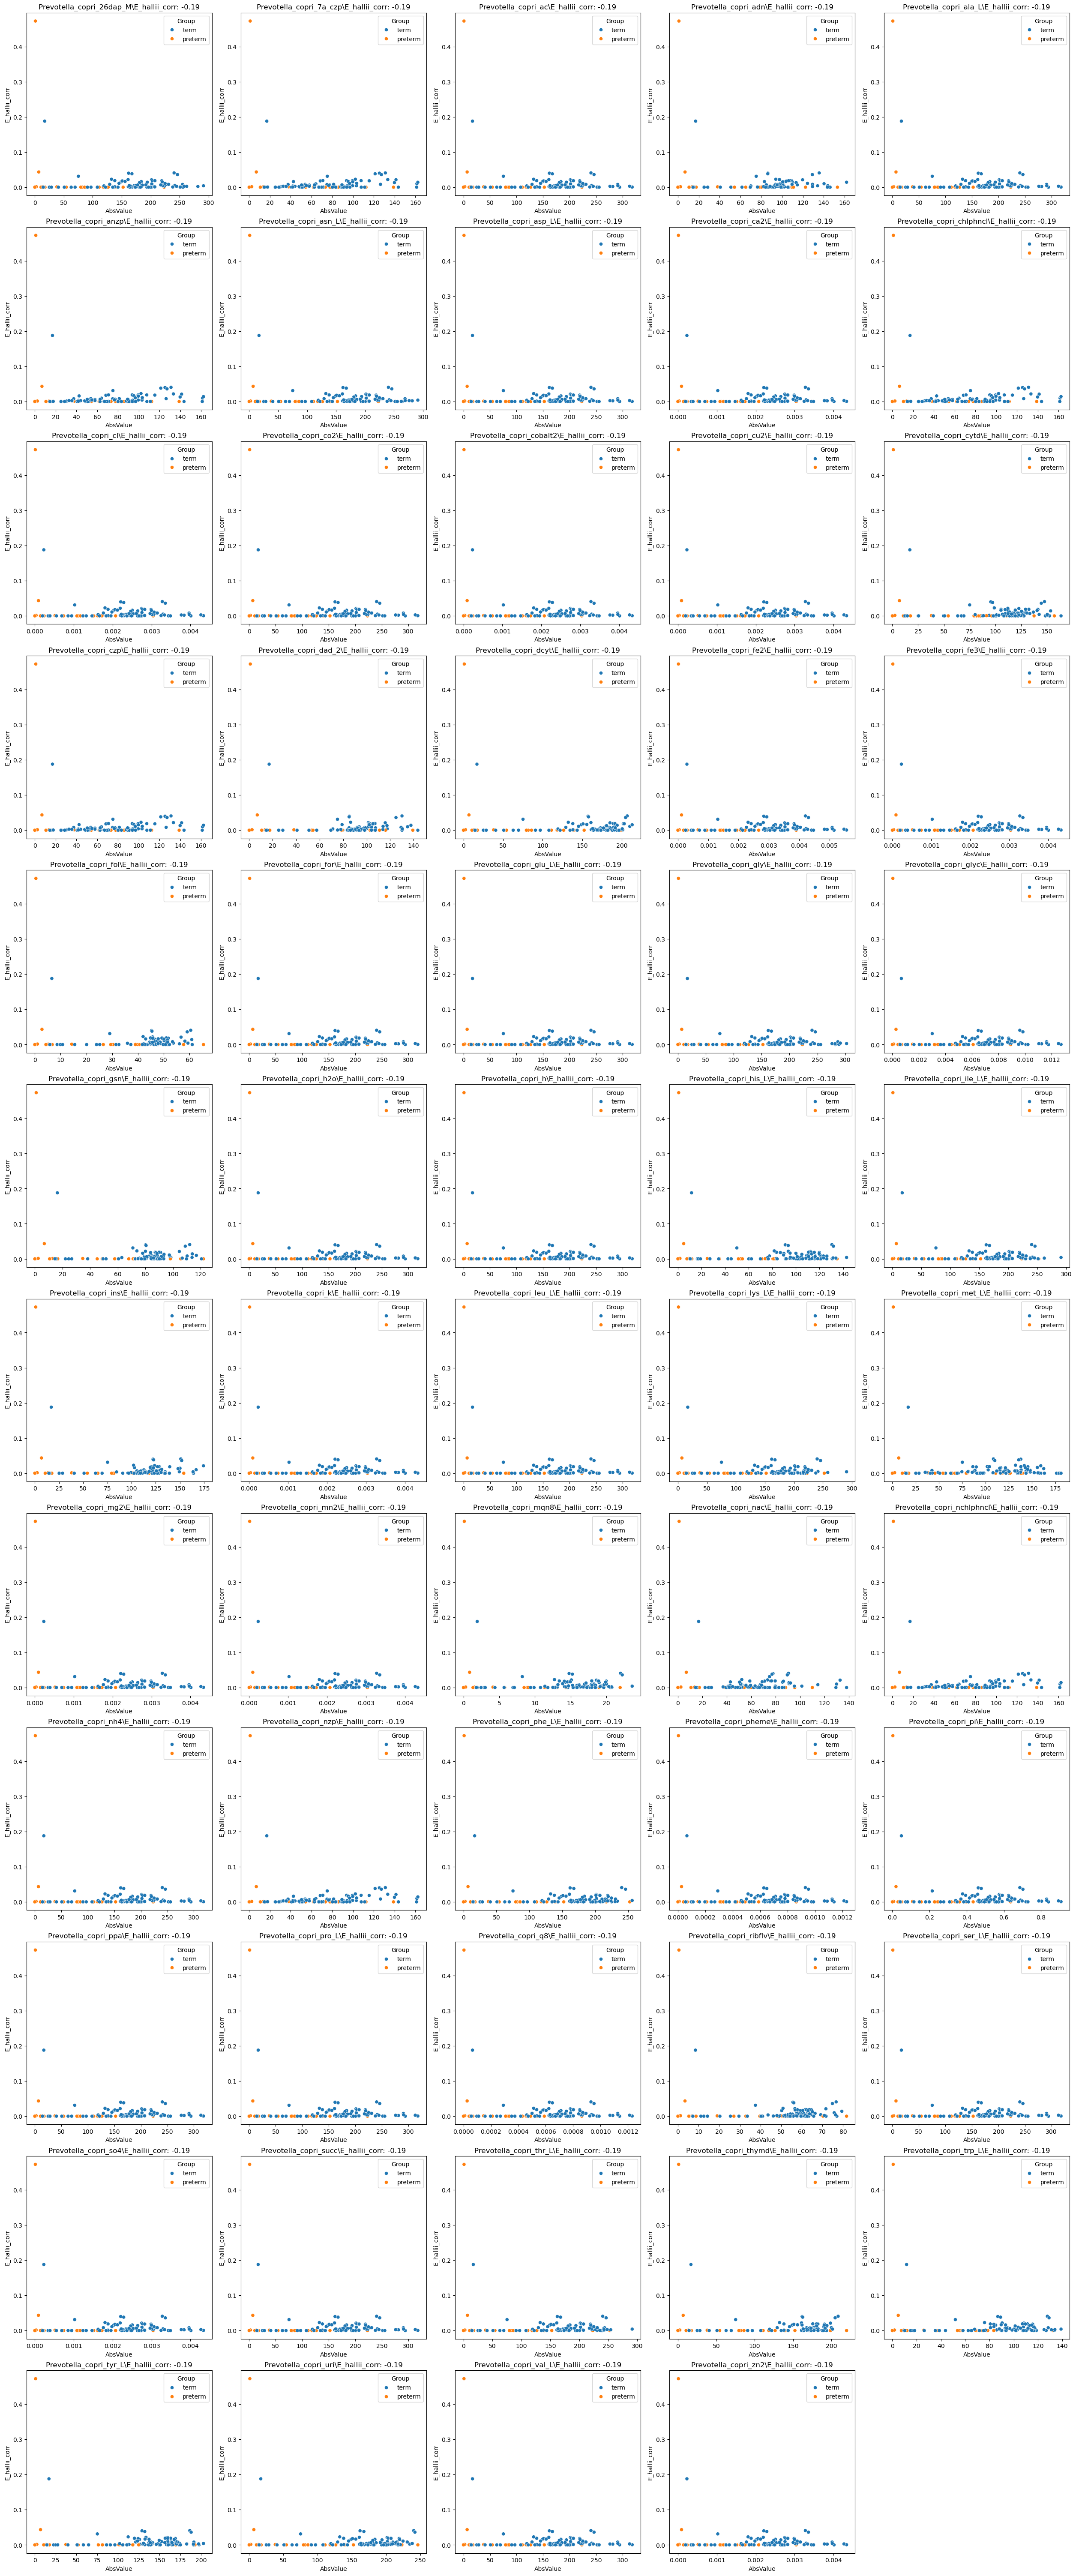

In [37]:
num_plots = 59
cols = 5  # Number of columns in the grid
rows = (num_plots + cols - 1) // cols  # Calculate number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i in range(num_plots):
    column_name = p_copri_meta_butyrate_producers.columns[i]
    abs_values = np.abs(p_copri_meta_butyrate_producers.iloc[:, i])
    
    F_prau_corr = np.corrcoef(abs_values, p_copri_meta_butyrate_producers.iloc[:, 60])[1, 0]
    R_faecis_corr = np.corrcoef(abs_values, p_copri_meta_butyrate_producers.iloc[:, 61])[1, 0]
    E_hallii_corr = np.corrcoef(abs_values, p_copri_meta_butyrate_producers.iloc[:, 62])[1, 0]

    # Scatter plot on the respective subplot
    sns.scatterplot(ax=axes[i], data=p_copri_meta_butyrate_producers, 
                    x=abs_values, y=p_copri_meta_butyrate_producers.iloc[:, 60], hue='Group')
    
    axes[i].set_title(f"{column_name}\nF_prau_corr: {F_prau_corr:.2f}")
    axes[i].set_xlabel('AbsValue')
    axes[i].set_ylabel('F_prau')

# Hide any empty subplots if the number of plots is not a perfect square
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.show()

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i in range(num_plots):
    column_name = p_copri_meta_butyrate_producers.columns[i]
    abs_values = np.abs(p_copri_meta_butyrate_producers.iloc[:, i])
    
    # Scatter plot on the respective subplot
    sns.scatterplot(ax=axes[i], data=p_copri_meta_butyrate_producers, 
                    x=abs_values, y=p_copri_meta_butyrate_producers.iloc[:, 61], hue='Group')
    
    axes[i].set_title(f"{column_name}\R_faecis_corr: {R_faecis_corr:.2f}")
    axes[i].set_xlabel('AbsValue')
    axes[i].set_ylabel('R_faecis')

# Hide any empty subplots if the number of plots is not a perfect square
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.show()


fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i in range(num_plots):
    column_name = p_copri_meta_butyrate_producers.columns[i]
    abs_values = np.abs(p_copri_meta_butyrate_producers.iloc[:, i])
    
    # Scatter plot on the respective subplot
    sns.scatterplot(ax=axes[i], data=p_copri_meta_butyrate_producers, 
                    x=abs_values, y=p_copri_meta_butyrate_producers.iloc[:, 62], hue='Group')
    
    axes[i].set_title(f"{column_name}\E_hallii_corr: {E_hallii_corr:.2f}")
    axes[i].set_xlabel('AbsValue')
    axes[i].set_ylabel('E_hallii_corr')

# Hide any empty subplots if the number of plots is not a perfect square
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.show()



### amount of secretion of metabolite from P. copri vs abundance of F. prau in samples 




In [38]:
'''f_prau_abun = pd.DataFrame(norm_abundance.loc['panFaecalibacterium_prausnitzii'])
p_copri_asn_l_f_prau_df = pd.merge(p_copri_asn_l_df, f_prau_abun, left_index=True, right_index=True)
p_copri_asn_l_f_prau_df.columns = ['p_copri_asn_sec', 'Group', 'F_prau_abun']
p_copri_asn_l_f_prau_df.head()

plt.plot(p_copri_asn_l_f_prau_df['F_prau_abun'], np.abs(p_copri_asn_l_f_prau_df['p_copri_asn_sec']), label = p_copri_asn_l_f_prau_df['Group'], marker = 'o', linestyle ='')

print(np.corrcoef(p_copri_asn_l_f_prau_df['F_prau_abun'], np.abs(p_copri_asn_l_f_prau_df['p_copri_asn_sec']))[1,0])AMANHI_P_concat_species_level
'''

norm_abundance.loc['panFaecalibacterium_prausnitzii'].sort_values(ascending=False)

p_copri_meta_butyrate_producers.head(10)


# should probably look at the uptake of metabolites for F. prau and see if there is correlation between uptake and abundance that is same as correlation between secretion of metabolites by P. copri and correlation of abundance of F. prau 

### correlate uptake of metabolites from F. prau with abundance of F. prau 

f_prau_abun_uptake_df = pd.merge(pd.merge(microbe_sec_sig[microbe_sec_sig['Averages'].str.contains("Faecalibacterium_prausnitzii")].set_index('Averages').transpose(), AMANHI_P_sampinfo, right_index=True, left_index=True),butryate_producers_ab_df , right_index=True, left_index=True)

'''

num_plots = 63
cols = 5  # Number of columns in the grid
rows = (num_plots + cols - 1) // cols  # Calculate number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i in range(num_plots):
    column_name = f_prau_abun_uptake_df.columns[i]
    abs_values = np.abs(f_prau_abun_uptake_df.iloc[:, i])
    
    F_prau_corr = np.corrcoef(abs_values, f_prau_abun_uptake_df.iloc[:, 64])[1, 0]

    # Scatter plot on the respective subplot
    sns.scatterplot(ax=axes[i], data=f_prau_abun_uptake_df, 
                    x=abs_values, y=f_prau_abun_uptake_df.iloc[:, 64], hue='Group')
    
    axes[i].set_title(f"{column_name}\nF_prau_corr: {F_prau_corr:.2f}")
    axes[i].set_xlabel('AbsValue')
    axes[i].set_ylabel('F_prau')

# Hide any empty subplots if the number of plots is not a perfect square
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

'''



### here might be interesting to fit a glm to identify which interactions of secretion of metabolites from P. copri and f. prau abundance to predict term group 

# fitting mixed linear model 


f_prau_abun_uptake_df.to_csv('./f_prau_abun_uptake_strat.csv')
p_copri_meta_butyrate_producers.to_csv('./p_copri_but_prod_abun.csv')


In [39]:
### Performing network analysis on agora data
## fitting models and doing stats in R actually 

# wonder if looking at the interactions between uptake from F. prau and the secretion from p. copri with growth of F. prau 

# if we find interactions where all 3 are important for prediction of preterm and term then it might lend that the secretion of metabolites with uptake is required for subsequent growth 


f_prau_abun_uptake_df.head()


Faecalibacterium_prausnitzii_3mop  \
X17FM0048401                            -8.2104   
X17FM0050301                           -13.7176   
X17FM0050501                           -30.0972   
X17FM0052701                           -28.3160   
X17FM0057101                            -8.3592   

              Faecalibacterium_prausnitzii_4hbz  \
X17FM0048401                            -7.9717   
X17FM0050301                           -13.3188   
X17FM0050501                           -29.2223   
X17FM0052701                           -27.4929   
X17FM0057101                            -8.1162   

              Faecalibacterium_prausnitzii_7a_czp  \
X17FM0048401                              -8.2104   
X17FM0050301                             -13.7176   
X17FM0050501                             -30.0972   
X17FM0052701                             -28.3160   
X17FM0057101                              -8.3592   

              Faecalibacterium_prausnitzii_Lcystin  \
X17FM0048401                               -8.2104   
X17FM0050301                              -13.7176   
X17FM0050501                              -30.0972   
X17FM0052701                              -28.3160   
X17FM0057101                               -8.3592   

              Faecalibacterium_prausnitzii_ac  \
X17FM0048401                          -8.2104   
X17FM0050301                         -13.7176   
X17FM0050501                         -30.0972   
X17FM0052701                         -28.3160   
X17FM0057101                          -8.3592   

              Faecalibacterium_prausnitzii_acald  \
X17FM0048401                             -8.2104   
X17FM0050301                            -13.7176   
X17FM0050501                            -30.0972   
X17FM0052701                            -28.3160   
X17FM0057101                             -8.3592   

              Faecalibacterium_prausnitzii_ala_D  \
X17FM0048401                             -8.1978   
X17FM0050301                            -13.6966   
X17FM0050501                            -30.0512   
X17FM0052701                            -28.2727   
X17FM0057101                             -8.3464   

              Faecalibacterium_prausnitzii_anzp  \
X17FM0048401                            -8.2104   
X17FM0050301                           -13.7176   
X17FM0050501                           -30.0972   
X17FM0052701                           -28.3160   
X17FM0057101                            -8.3592   

              Faecalibacterium_prausnitzii_arg_L  \
X17FM0048401                             -8.2055   
X17FM0050301                            -13.7094   
X17FM0050501                            -30.0793   
X17FM0052701                            -28.2991   
X17FM0057101                             -8.3542   

              Faecalibacterium_prausnitzii_asn_L  ...  \
X17FM0048401                             -8.2104  ...   
X17FM0050301                            -13.7176  ...   
X17FM0050501                            -30.0972  ...   
X17FM0052701                            -28.3160  ...   
X17FM0057101                             -8.3592  ...   

              Faecalibacterium_prausnitzii_thm  \
X17FM0048401                          0.000083   
X17FM0050301                          0.000138   
X17FM0050501                          0.000303   
X17FM0052701                          0.000285   
X17FM0057101                          0.000084   

              Faecalibacterium_prausnitzii_thymd  \
X17FM0048401                             -8.2104   
X17FM0050301                            -13.7172   
X17FM0050501                            -30.0962   
X17FM0052701                            -28.3151   
X17FM0057101                             -8.3592   

              Faecalibacterium_prausnitzii_trp_L  \
X17FM0048401                            0.001055   
X17FM0050301                            0.001763   
X17FM0050501                            0.003867   
X17FM0052701                            0.003638  

In [40]:
f_prau_but_sec_p_copri_sec = pd.merge(p_copri_meta_butyrate_producers, f_brau_but_sec, left_index=True, right_index=True)

f_prau_but_sec_p_copri_sec.to_csv('./f_prau_but_sec_p_copri_sec.csv')

In [41]:
f_prau_but_sec_p_copri_sec.head()

Prevotella_copri_26dap_M  Prevotella_copri_7a_czp  \
X17FM0048401                -161.34830                 -30.9193   
X17FM0050301                  -0.48173                  -0.4818   
X17FM0050501                -118.14660                 -94.2897   
X17FM0052701                -148.82610                 -95.4529   
X17FM0057101                 -13.68320                 -13.6852   

              Prevotella_copri_ac  Prevotella_copri_adn  \
X17FM0048401            -161.3720              -88.0824   
X17FM0050301              -0.4818               -0.4818   
X17FM0050501            -118.1640             -109.5219   
X17FM0052701            -148.8480             -109.7785   
X17FM0057101             -13.6852              -13.6852   

              Prevotella_copri_ala_L  Prevotella_copri_anzp  \
X17FM0048401              -161.11430               -30.9193   
X17FM0050301                -0.48103                -0.4818   
X17FM0050501              -117.97530               -94.2897   
X17FM0052701              -148.61030               -95.4529   
X17FM0057101               -13.66330               -13.6852   

              Prevotella_copri_asn_L  Prevotella_copri_asp_L  \
X17FM0048401               -161.3720               -161.3720   
X17FM0050301                 -0.4818                 -0.4818   
X17FM0050501               -118.1640               -118.1640   
X17FM0052701               -148.8480               -148.8480   
X17FM0057101                -13.6852                -13.6852   

              Prevotella_copri_ca2  Prevotella_copri_chlphncl  ...  \
X17FM0048401              0.002200                   -30.9193  ...   
X17FM0050301              0.000007                    -0.4818  ...   
X17FM0050501              0.001611                   -94.2897  ...   
X17FM0052701              0.002029                   -95.4529  ...   
X17FM0057101              0.000187                   -13.6852  ...   

              Prevotella_copri_trp_L  Prevotella_copri_tyr_L  \
X17FM0048401               -85.95880              -126.71360   
X17FM0050301                -0.33893                -0.48164   
X17FM0050501               -69.01360              -101.94570   
X17FM0052701               -85.10920              -125.89030   
X17FM0057101                -9.36190               -13.68080   

              Prevotella_copri_uri  Prevotella_copri_val_L  \
X17FM0048401             -161.3720              -161.21790   
X17FM0050301               -0.4818                -0.48134   
X17FM0050501             -118.1640              -118.05120   
X17FM0052701             -148.8480              -148.70590   
X17FM0057101              -13.6852               -13.67210   

              Prevotella_copri_zn2    Group  panFaecalibacterium_prausnitzii  \
X17FM0048401              0.002200     term                         0.020526   
X17FM0050301              0.000007  preterm                         0.034294   
X17FM0050501              0.001611  preterm                         0.075243   
X17FM0052701              0.002029     term                         0.070790   
X17FM0057101              0.000187  preterm                         0.020898   

              panRoseburia_faecis  panEubacterium_hallii  \
X17FM0048401             0.007329               0.001659   
X17FM0050301             0.062415               0.000000   
X17FM0050501             0.000000               0.000000   
X17FM0052701             0.012491               0.015414   
X17FM0057101             0.000000               0.001073   

              Faecalibacterium_prausnitzii_but  
X17FM0048401                           -8.2104  
X17FM0050301                          -13.7176  
X17FM0050501                          -30.0972  
X17FM0052701                          -28.3160  
X17FM0057101                           -8.3592  

[5 rows x 64 columns]

In [42]:
### determine if there is correlation between secretion of metabolite from p. copri and uptake of metabolite from F. brau 

p_copri_meta.head()

Averages      Prevotella_copri_26dap_M  Prevotella_copri_7a_czp  \
X17FM0048401                -161.34830                 -30.9193   
X17FM0050301                  -0.48173                  -0.4818   
X17FM0050501                -118.14660                 -94.2897   
X17FM0052701                -148.82610                 -95.4529   
X17FM0057101                 -13.68320                 -13.6852   

Averages      Prevotella_copri_ac  Prevotella_copri_adn  \
X17FM0048401            -161.3720              -88.0824   
X17FM0050301              -0.4818               -0.4818   
X17FM0050501            -118.1640             -109.5219   
X17FM0052701            -148.8480             -109.7785   
X17FM0057101             -13.6852              -13.6852   

Averages      Prevotella_copri_ala_L  Prevotella_copri_anzp  \
X17FM0048401              -161.11430               -30.9193   
X17FM0050301                -0.48103                -0.4818   
X17FM0050501              -117.97530               -94.2897   
X17FM0052701              -148.61030               -95.4529   
X17FM0057101               -13.66330               -13.6852   

Averages      Prevotella_copri_asn_L  Prevotella_copri_asp_L  \
X17FM0048401               -161.3720               -161.3720   
X17FM0050301                 -0.4818                 -0.4818   
X17FM0050501               -118.1640               -118.1640   
X17FM0052701               -148.8480               -148.8480   
X17FM0057101                -13.6852                -13.6852   

Averages      Prevotella_copri_ca2  Prevotella_copri_chlphncl  ...  \
X17FM0048401              0.002200                   -30.9193  ...   
X17FM0050301              0.000007                    -0.4818  ...   
X17FM0050501              0.001611                   -94.2897  ...   
X17FM0052701              0.002029                   -95.4529  ...   
X17FM0057101              0.000187                   -13.6852  ...   

Averages      Prevotella_copri_ser_L  Prevotella_copri_so4  \
X17FM0048401               -161.3720              0.002200   
X17FM0050301                 -0.4818              0.000007   
X17FM0050501               -118.1640              0.001611   
X17FM0052701               -148.8480              0.002029   
X17FM0057101                -13.6852              0.000187   

Averages      Prevotella_copri_succ  Prevotella_copri_thr_L  \
X17FM0048401              -161.3720              -161.27970   
X17FM0050301                -0.4818                -0.48152   
X17FM0050501              -118.1640              -118.09640   
X17FM0052701              -148.8480              -148.76280   
X17FM0057101               -13.6852               -13.67740   

Averages      Prevotella_copri_thymd  Prevotella_copri_trp_L  \
X17FM0048401               -161.3720               -85.95880   
X17FM0050301                 -0.4818                -0.33893   
X17FM0050501               -118.1640               -69.01360   
X17FM0052701               -148.8480               -85.10920   
X17FM0057101                -13.6852                -9.36190   

Averages      Prevotella_copri_tyr_L  Prevotella_copri_uri  \
X17FM0048401              -126.71360             -161.3720   
X17FM0050301                -0.48164               -0.4818   
X17FM0050501              -101.94570             -118.1640   
X17FM0052701              -125.89030             -148.8480   
X17FM0057101               -13.68080              -13.6852   

Averages      Prevotella_copri_val_L  Prevotella_copri_zn2  
X17FM0048401              -161.21790              0.002200  
X17FM0050301                -0.48134              0.000007  
X17FM0050501              -118.05120              0.001611  
X17FM0052701              -148.70590              0.002029  
X17FM0057101               -13.67210              0.000187  

[5 rows x 59 columns]

In [43]:
# filter uptake file by F. prau only 
index_to_filter_up_f_prau =[]
microbe_up_sig.head()
for i in range(0, len(microbe_up_sig)):
    if (microbe_up_sig['Averages'][i].split('_')[1]) == 'prausnitzii':
        index_to_filter_up_f_prau.append(microbe_up_sig.index[i])

microbe_up_f_prau_filtered = microbe_up_sig.iloc[index_to_filter_up_f_prau].reset_index(drop=True)

In [44]:
## want to pull the list of metabolites that p. copri sig secretes and then the list of metabolites that f_prau secretes to then merge the two lists so that we only have matching metabolites for plotting


## P. copri sec metabolites

sig_metabolites_sec_p_copri = []

for i in range(0, len(microbe_sec_sig_p_copri)):
    sig_metabolites_sec_p_copri.append(microbe_sec_sig_p_copri['Averages'][i].split('_', 2)[2]) 

## F. prau up metabolites

sig_metabolites_up_f_prau = []


for i in range(0, len(microbe_up_f_prau_filtered)):
    sig_metabolites_up_f_prau.append(microbe_up_f_prau_filtered['Averages'][i].split('_', 2)[2]) 

## intersecting the lists of metabolites sec from P. copri with up from F. prau
shared_met_p_copri_f_prau = list(set.intersection(*map(set, [sig_metabolites_sec_p_copri, sig_metabolites_up_f_prau])))

## merge uptake df of f_prau with sec df of p_copri and then filter 

p_copri_sec_f_brau_up_df = pd.merge(microbe_up_f_prau_filtered.set_index('Averages').transpose(), microbe_sec_sig_p_copri.set_index('Averages').transpose(), left_index=True, right_index=True)
p_copri_sec_f_brau_up_df = p_copri_sec_f_brau_up_df.transpose().reset_index()

# go through merged dataframe and only keep indexes where metabolite is found in the shared metabolite list 

merged_df_index_to_keep =[]

for i in range(0, len(p_copri_sec_f_brau_up_df)):
    if (p_copri_sec_f_brau_up_df['Averages'][i].split('_',2)[2]) in shared_met_p_copri_f_prau:
        merged_df_index_to_keep.append(i)
    #merged_df_index_to_keep.append()
        
p_copri_sec_f_brau_up_filt_df = p_copri_sec_f_brau_up_df.iloc[merged_df_index_to_keep]
p_copri_sec_f_brau_up_filt_samp_info_df = pd.merge(p_copri_sec_f_brau_up_filt_df.set_index('Averages').transpose(), AMANHI_P_sampinfo, right_index=True, left_index=True)


In [45]:
p_copri_sec_f_brau_up_filt_samp_info_df.shape

(108, 99)

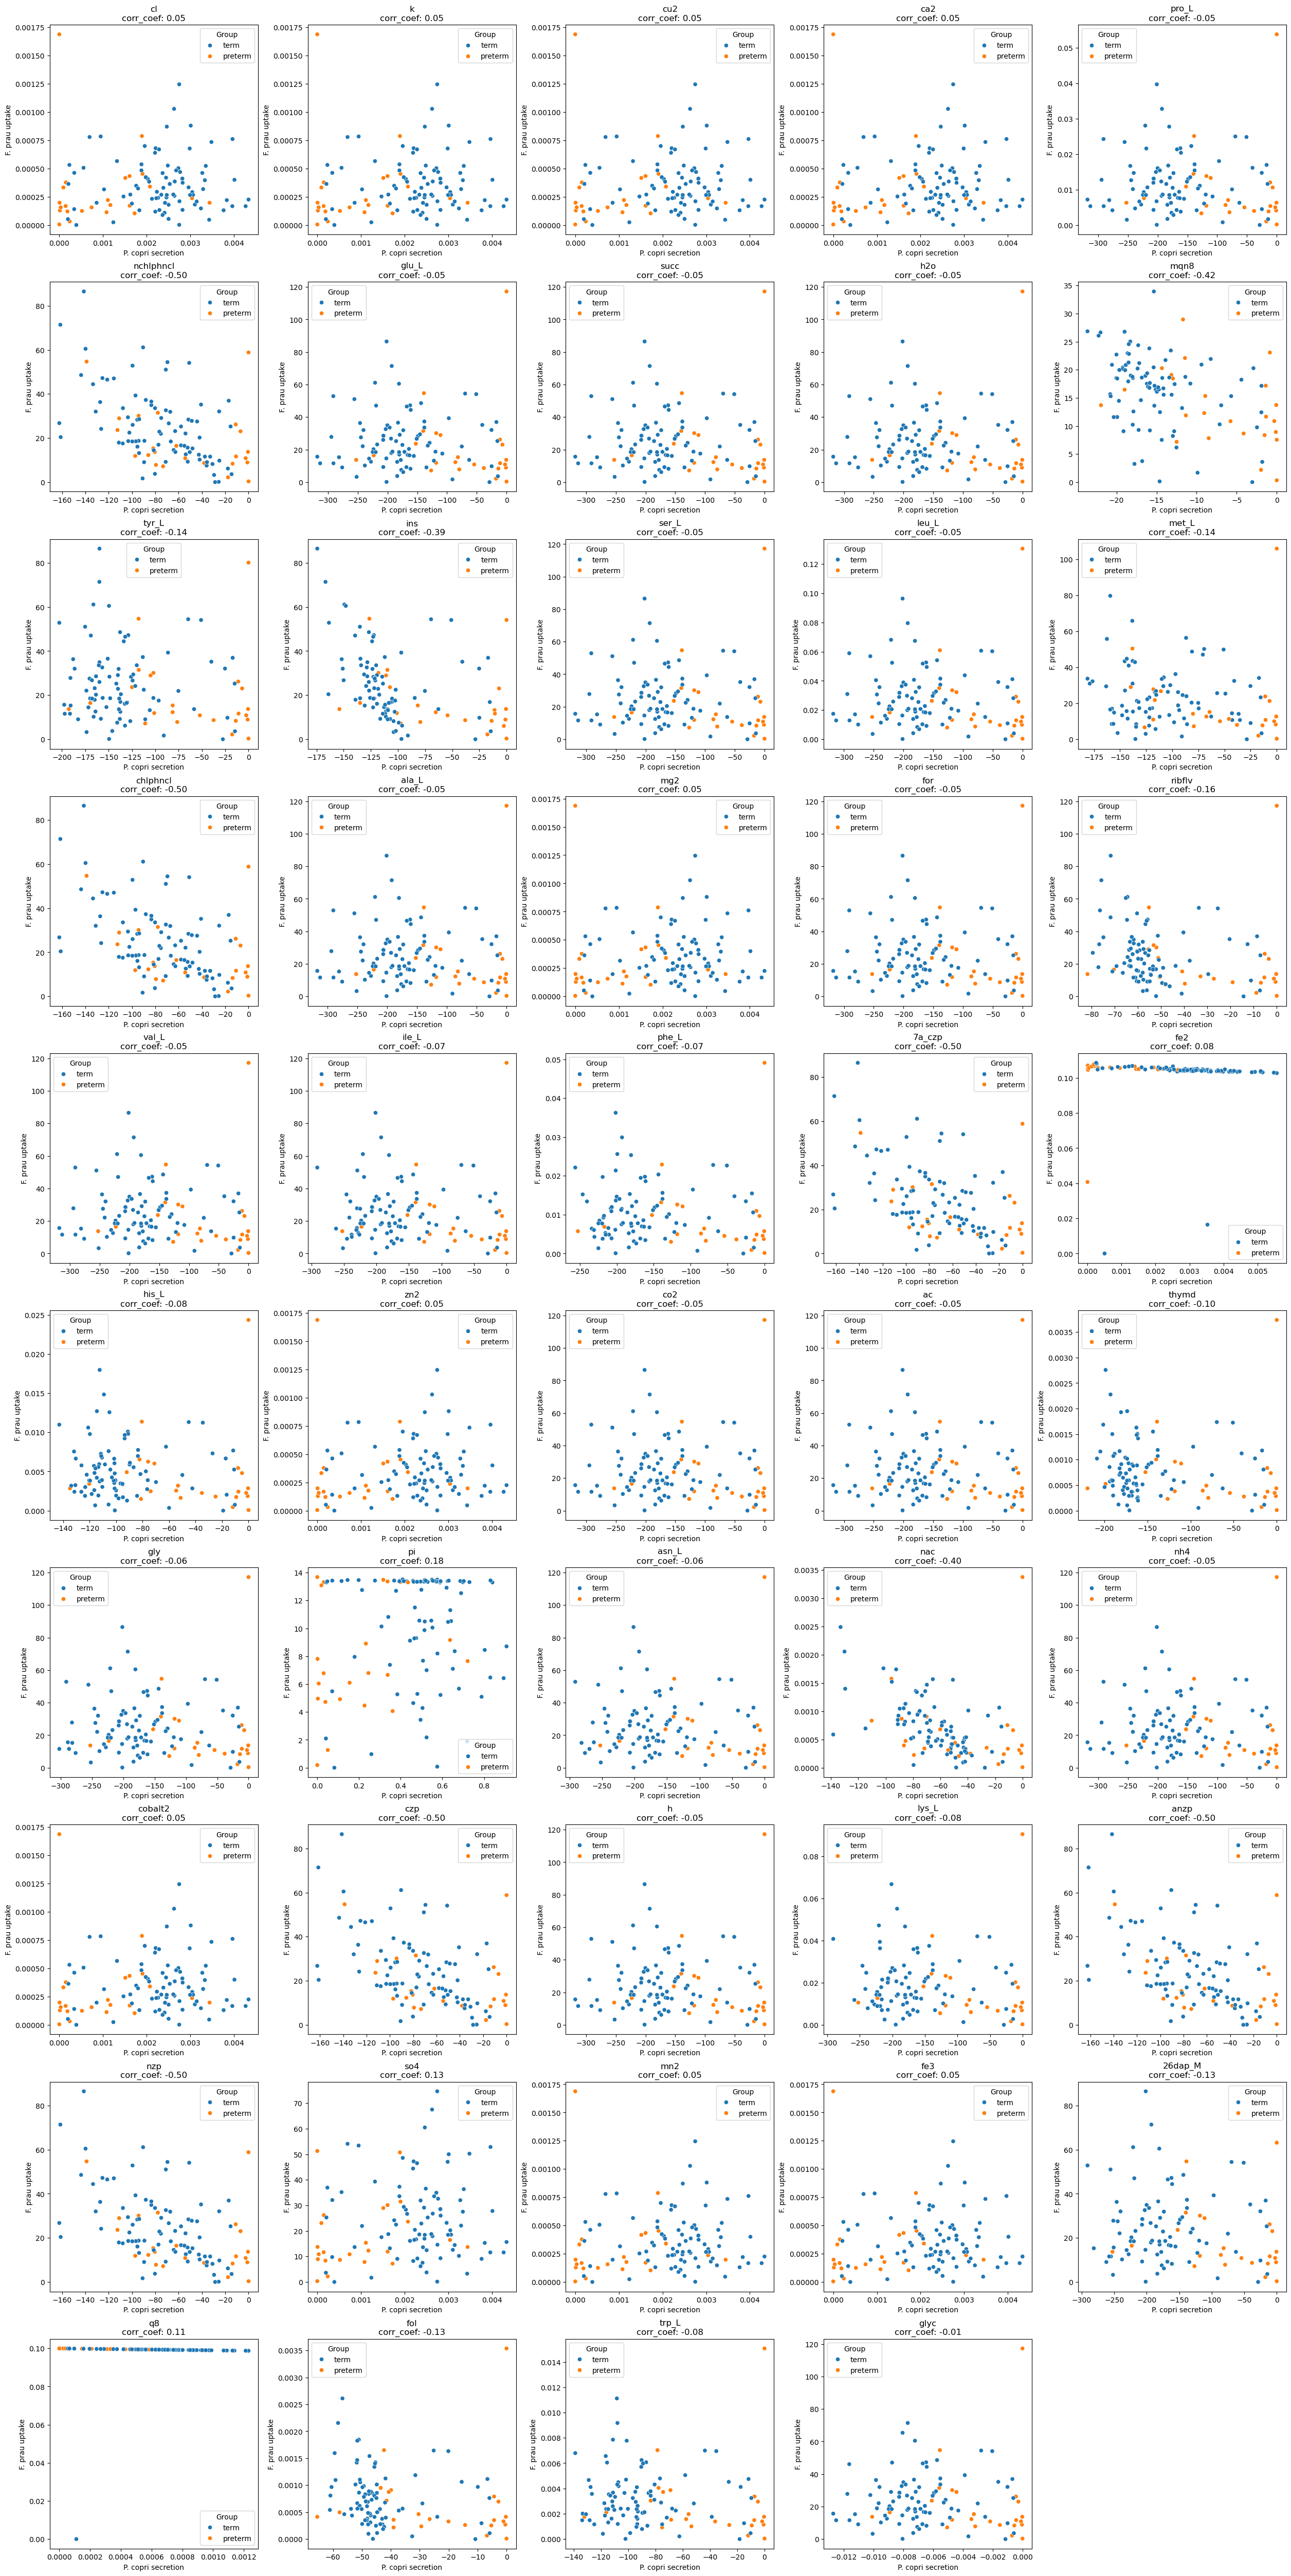

In [46]:
### loop through shared metabolite list and then plot p. copri sec of metabolite with f. prau uptake of said metabolite and then determine correlation coefficient too 
num_plots = len(shared_met_p_copri_f_prau)
cols = 5  # Number of columns in the grid
rows = (num_plots + cols - 1) // cols  # Calculate number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()



for i in range(0, len(shared_met_p_copri_f_prau)):
    
    temp_regex_copri = 'copri_' + shared_met_p_copri_f_prau[i]
    temp_regex_prau = 'prausnitzii_' + shared_met_p_copri_f_prau[i]
    temp_copri = p_copri_sec_f_brau_up_filt_samp_info_df.filter(regex=temp_regex_copri, axis=1).iloc[:,0]
    temp_prau = p_copri_sec_f_brau_up_filt_samp_info_df.filter(regex=temp_regex_prau, axis=1).iloc[:,0]

    #temp_copri = np.abs(temp_copri)
    corr_coef = np.corrcoef(temp_copri, temp_prau)[1,0]
    #print(corr_coef)
    #print(temp_copri.iloc[:,0])

    # Scatter plot on the respective subplot
    sns.scatterplot(ax=axes[i], data=p_copri_sec_f_brau_up_filt_samp_info_df,
                    x=temp_copri, y=temp_prau, hue='Group')
    
    axes[i].set_title(f"{shared_met_p_copri_f_prau[i]}\ncorr_coef: {corr_coef:.2f}")
    axes[i].set_xlabel('P. copri secretion')
    axes[i].set_ylabel('F. prau uptake')

# Hide any empty subplots if the number of plots is not a perfect square
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.show()



In [47]:
p_copri_sec_f_brau_up_filt_samp_info_df.filter(regex = 'mqn8', axis = 1)

Faecalibacterium_prausnitzii_mqn8  Prevotella_copri_mqn8
X17FM0048401                             8.2104             -12.967900
X17FM0050301                            13.7176              -0.060124
X17FM0050501                            22.0762             -11.453600
X17FM0052701                            18.5348             -14.284900
X17FM0057101                             8.3592              -1.519000
...                                         ...                    ...
X17FM0210701                            24.3518             -17.288300
X17FM0212701                            26.8385             -23.620300
X17FM0213901                            17.4421             -12.742500
X17FM0218301                            13.1784             -11.818600
X17FM0219901                            20.9137              -9.392500

[108 rows x 2 columns]

In [48]:
microbe_up_sig.set_index('Averages').filter(regex ='mqn8', axis=0)

X17FM0048401  X17FM0050301  X17FM0050501  \
Averages                                                                      
Prevotella_copri_mqn8                  0.001249      0.000004      0.000915   
Escherichia_coli_mqn8                  0.000108      0.003575      0.000492   
Faecalibacterium_prausnitzii_mqn8      8.210400     13.717600     22.076200   
Dorea_formicigenerans_mqn8             0.000022      0.000000      0.000033   
Bifidobacterium_bifidum_mqn8           0.000000      0.000442      0.000000   
Bacteroides_vulgatus_mqn8              0.000000      0.000026      0.000086   
Klebsiella_pneumoniae_mqn8             0.000000      0.000554      0.000000   
Prevotella_stercorea_mqn8              0.000000      0.000000      0.000000   

                                   X17FM0052701  X17FM0057101  X17FM0063201  \
Averages                                                                      
Prevotella_copri_mqn8                  0.001152      0.000106      0.001328   
Escherichia_coli_mqn8                  0.000157      0.006160      0.000687   
Faecalibacterium_prausnitzii_mqn8     18.534800      8.359200     18.604400   
Dorea_formicigenerans_mqn8             0.000030      0.000428      0.000060   
Bifidobacterium_bifidum_mqn8           0.000000      0.000024      0.000000   
Bacteroides_vulgatus_mqn8              0.000000      0.000080      0.000000   
Klebsiella_pneumoniae_mqn8             0.000000      0.000000      0.000000   
Prevotella_stercorea_mqn8              0.000044      0.000000      0.000024   

                                   X17FM0063301  X17FM0064301  X17FM0064901  \
Averages                                                                      
Prevotella_copri_mqn8                  0.000000      0.000295      0.001246   
Escherichia_coli_mqn8                  0.001300      0.001277      0.000000   
Faecalibacterium_prausnitzii_mqn8      7.539000      8.656000     16.486800   
Dorea_formicigenerans_mqn8             0.000000      0.000000      0.000054   
Bifidobacterium_bifidum_mqn8           0.000000      0.000970      0.000000   
Bacteroides_vulgatus_mqn8              0.000013      0.000089      0.000000   
Klebsiella_pneumoniae_mqn8             0.000000      0.000067      0.000000   
Prevotella_stercorea_mqn8              0.000000      0.000000      0.000023   

                                   X17FM0066001  ...  X17FM0203701  \
Averages                                         ...                 
Prevotella_copri_mqn8                  0.000859  ...      0.001376   
Escherichia_coli_mqn8                  0.002699  ...      0.000042   
Faecalibacterium_prausnitzii_mqn8     28.943200  ...     13.599600   
Dorea_formicigenerans_mqn8             0.000034  ...      0.000008   
Bifidobacterium_bifidum_mqn8           0.000674  ...      0.000000   
Bacteroides_vulgatus_mqn8              0.000026  ...      0.000000   
Klebsiella_pneumoniae_mqn8             0.000000  ...      0.000000   
Prevotella_stercorea_mqn8              0.000000  ...      0.000006   

                                   X17FM0205401  X17FM0205801  X17FM0206701  \
Averages                                                                      
Prevotella_copri_mqn8                  0.000222      0.001298      0.001484   
Escherichia_coli_mqn8                  0.000354      0.000026      0.000127   
Faecalibacterium_prausnitzii_mqn8      0.000000     17.149100     18.746400   
Dorea_formicigenerans_mqn8             0.000001      0.000062      0.000067   
Bifidobacterium_bifidum_mqn8           0.000000      0.000000      0.000000   
Bacteroides_vulgatus_mqn8              0.000000      0.000000      0.000000   
Klebsiella_pneumoniae_mqn8             0.000000      0.000000      0.000000   
Prevotella_stercorea_mqn8              0.000000      0.000003      0.000015   

                                   X17FM0210301  X17FM0210701  X17FM0212701  \
Averages                                                                      
Prevotella_c

In [51]:
microbe_up_sig_high_fib.set_index('Averages').filter(regex ='mqn8', axis=0)

X17FM0048401  X17FM0050301  X17FM0050501  \
Averages                                                                      
Prevotella_copri_mqn8                  0.001249      0.000004      0.000915   
Escherichia_coli_mqn8                  0.000108      0.003575      0.000492   
Faecalibacterium_prausnitzii_mqn8      8.210400     13.717600     22.139800   
Dorea_formicigenerans_mqn8             0.000022      0.000000      0.000033   
Bifidobacterium_bifidum_mqn8           0.000000      0.000442      0.000000   
Bacteroides_vulgatus_mqn8              0.000000      0.000026      0.000086   
Klebsiella_pneumoniae_mqn8             0.000000      0.000554      0.000000   
Prevotella_stercorea_mqn8              0.000000      0.000000      0.000000   

                                   X17FM0052701  X17FM0057101  X17FM0063201  \
Averages                                                                      
Prevotella_copri_mqn8                  0.001152      0.000106      0.001328   
Escherichia_coli_mqn8                  0.000157      0.006160      0.000687   
Faecalibacterium_prausnitzii_mqn8     18.642500      8.359200     18.604400   
Dorea_formicigenerans_mqn8             0.000030      0.000428      0.000060   
Bifidobacterium_bifidum_mqn8           0.000000      0.000024      0.000000   
Bacteroides_vulgatus_mqn8              0.000000      0.000080      0.000000   
Klebsiella_pneumoniae_mqn8             0.000000      0.000000      0.000000   
Prevotella_stercorea_mqn8              0.000044      0.000000      0.000024   

                                   X17FM0063301  X17FM0064301  X17FM0064901  \
Averages                                                                      
Prevotella_copri_mqn8                  0.000000      0.000295      0.001246   
Escherichia_coli_mqn8                  0.001300      0.001277      0.000000   
Faecalibacterium_prausnitzii_mqn8      7.539000      8.656000     16.488000   
Dorea_formicigenerans_mqn8             0.000000      0.000000      0.000054   
Bifidobacterium_bifidum_mqn8           0.000000      0.000970      0.000000   
Bacteroides_vulgatus_mqn8              0.000013      0.000089      0.000000   
Klebsiella_pneumoniae_mqn8             0.000000      0.000067      0.000000   
Prevotella_stercorea_mqn8              0.000000      0.000000      0.000023   

                                   X17FM0066001  ...  X17FM0203701  \
Averages                                         ...                 
Prevotella_copri_mqn8                  0.000859  ...      0.001376   
Escherichia_coli_mqn8                  0.002699  ...      0.000042   
Faecalibacterium_prausnitzii_mqn8     28.943200  ...     13.599600   
Dorea_formicigenerans_mqn8             0.000034  ...      0.000008   
Bifidobacterium_bifidum_mqn8           0.000674  ...      0.000000   
Bacteroides_vulgatus_mqn8              0.000026  ...      0.000000   
Klebsiella_pneumoniae_mqn8             0.000000  ...      0.000000   
Prevotella_stercorea_mqn8              0.000000  ...      0.000006   

                                   X17FM0205401  X17FM0205801  X17FM0206701  \
Averages                                                                      
Prevotella_copri_mqn8                  0.000222      0.001298      0.001484   
Escherichia_coli_mqn8                  0.000354      0.000026      0.000127   
Faecalibacterium_prausnitzii_mqn8      0.000000     17.280800     18.746400   
Dorea_formicigenerans_mqn8             0.000001      0.000062      0.000067   
Bifidobacterium_bifidum_mqn8           0.000000      0.000000      0.000000   
Bacteroides_vulgatus_mqn8              0.000000      0.000000      0.000000   
Klebsiella_pneumoniae_mqn8             0.000000      0.000000      0.000000   
Prevotella_stercorea_mqn8              0.000000      0.000003      0.000015   

                                   X17FM0210301  X17FM0210701  X17FM0212701  \
Averages                                                                      
Prevotella_c

In [49]:
microbe_sec_sig.set_index('Averages').filter(regex ='mqn8', axis=0)

X17FM0048401  X17FM0050301  X17FM0050501  \
Averages                                                                      
Prevotella_copri_mqn8                 -12.96790     -0.060124     -11.45360   
Escherichia_coli_mqn8                  -0.66058    -18.648300      -2.65100   
Faecalibacterium_prausnitzii_mqn8      -2.83720     -3.421600      -5.06120   
Dorea_formicigenerans_mqn8             -0.48618      0.000000      -0.64570   
Bifidobacterium_bifidum_mqn8            0.00000     -1.708500       0.00000   
Bacteroides_vulgatus_mqn8               0.00000     -0.131390      -0.43536   
Klebsiella_pneumoniae_mqn8              0.00000     -4.621000       0.00000   
Prevotella_stercorea_mqn8               0.00000      0.000000       0.00000   

                                   X17FM0052701  X17FM0057101  X17FM0063201  \
Averages                                                                      
Prevotella_copri_mqn8                -14.284900      -1.51900    -16.839400   
Escherichia_coli_mqn8                 -0.914160     -32.05990     -3.664300   
Faecalibacterium_prausnitzii_mqn8     -4.849100      -2.85130     -3.918600   
Dorea_formicigenerans_mqn8            -0.604020      -6.06760     -1.008800   
Bifidobacterium_bifidum_mqn8           0.000000      -0.18868      0.000000   
Bacteroides_vulgatus_mqn8              0.000000      -0.40561      0.000000   
Klebsiella_pneumoniae_mqn8             0.000000       0.00000      0.000000   
Prevotella_stercorea_mqn8              0.000044       0.00000      0.000024   

                                   X17FM0063301  X17FM0064301  X17FM0064901  \
Averages                                                                      
Prevotella_copri_mqn8                  0.000000      -4.13100    -15.106900   
Escherichia_coli_mqn8                 -6.847100      -6.72560      0.000000   
Faecalibacterium_prausnitzii_mqn8    -12.329800      -2.89010     -6.398500   
Dorea_formicigenerans_mqn8             0.000000       0.00000     -0.928900   
Bifidobacterium_bifidum_mqn8           0.000000      -3.19120      0.000000   
Bacteroides_vulgatus_mqn8             -0.066923      -0.45200      0.000000   
Klebsiella_pneumoniae_mqn8             0.000000      -0.64921      0.000000   
Prevotella_stercorea_mqn8              0.000000       0.00000      0.000023   

                                   X17FM0066001  ...  X17FM0203701  \
Averages                                         ...                 
Prevotella_copri_mqn8                 -11.69580  ...    -15.282300   
Escherichia_coli_mqn8                 -14.10630  ...     -0.320510   
Faecalibacterium_prausnitzii_mqn8      -4.85490  ...     -3.388300   
Dorea_formicigenerans_mqn8             -0.65845  ...     -0.297530   
Bifidobacterium_bifidum_mqn8           -2.36100  ...      0.000000   
Bacteroides_vulgatus_mqn8              -0.12938  ...      0.000000   
Klebsiella_pneumoniae_mqn8              0.00000  ...      0.000000   
Prevotella_stercorea_mqn8               0.00000  ...      0.000006   

                                   X17FM0205401  X17FM0205801  X17FM0206701  \
Averages                                                                      
Prevotella_copri_mqn8                  -3.05010    -15.253700    -18.005600   
Escherichia_coli_mqn8                  -1.93450     -0.233420     -0.761260   
Faecalibacterium_prausnitzii_mqn8       0.00000     -6.627700     -3.906000   
Dorea_formicigenerans_mqn8             -0.11044     -1.041000     -1.105300   
Bifidobacterium_bifidum_mqn8            0.00000      0.000000      0.000000   
Bacteroides_vulgatus_mqn8               0.00000      0.000000      0.000000   
Klebsiella_pneumoniae_mqn8              0.00000      0.000000      0.000000   
Prevotella_stercorea_mqn8               0.00000      0.000003      0.000015   

                                   X17FM0210301  X17FM0210701  X17FM0212701  \
Averages                                                                      
Prevotella_c

In [53]:
microbe_sec_sig_high_fib.set_index('Averages').filter(regex ='mqn8', axis=0)

X17FM0048401  X17FM0050301  X17FM0050501  \
Averages                                                                      
Prevotella_copri_mqn8                 -12.99220     -0.060124     -11.45480   
Escherichia_coli_mqn8                  -0.66058    -18.648300      -2.65100   
Faecalibacterium_prausnitzii_mqn8      -2.83720     -3.421600      -5.06120   
Dorea_formicigenerans_mqn8             -0.48618      0.000000      -0.64570   
Bifidobacterium_bifidum_mqn8            0.00000     -1.933700       0.00000   
Bacteroides_vulgatus_mqn8               0.00000     -0.131390      -0.43536   
Klebsiella_pneumoniae_mqn8              0.00000     -4.621000       0.00000   
Prevotella_stercorea_mqn8               0.00000      0.000000       0.00000   

                                   X17FM0052701  X17FM0057101  X17FM0063201  \
Averages                                                                      
Prevotella_copri_mqn8                -14.286100      -1.51900    -16.900100   
Escherichia_coli_mqn8                 -0.914160     -32.05990     -3.664300   
Faecalibacterium_prausnitzii_mqn8     -4.849100      -2.85130     -3.918700   
Dorea_formicigenerans_mqn8            -0.604020      -6.06760     -1.008800   
Bifidobacterium_bifidum_mqn8           0.000000      -0.18868      0.000000   
Bacteroides_vulgatus_mqn8              0.000000      -0.40561      0.000000   
Klebsiella_pneumoniae_mqn8             0.000000       0.00000      0.000000   
Prevotella_stercorea_mqn8              0.000044       0.00000      0.000024   

                                   X17FM0063301  X17FM0064301  X17FM0064901  \
Averages                                                                      
Prevotella_copri_mqn8                  0.000000      -4.13120    -15.108300   
Escherichia_coli_mqn8                 -6.847100      -6.72560      0.000000   
Faecalibacterium_prausnitzii_mqn8    -12.329800      -2.89020     -6.398600   
Dorea_formicigenerans_mqn8             0.000000       0.00000     -0.928900   
Bifidobacterium_bifidum_mqn8           0.000000      -3.41650      0.000000   
Bacteroides_vulgatus_mqn8             -0.066923      -0.45200      0.000000   
Klebsiella_pneumoniae_mqn8             0.000000      -0.64921      0.000000   
Prevotella_stercorea_mqn8              0.000000       0.00000      0.000023   

                                   X17FM0066001  ...  X17FM0203701  \
Averages                                         ...                 
Prevotella_copri_mqn8                 -11.69580  ...    -15.429400   
Escherichia_coli_mqn8                 -14.10630  ...     -0.320510   
Faecalibacterium_prausnitzii_mqn8      -4.85490  ...     -3.388300   
Dorea_formicigenerans_mqn8             -0.65845  ...     -0.297530   
Bifidobacterium_bifidum_mqn8           -2.58620  ...      0.000000   
Bacteroides_vulgatus_mqn8              -0.12938  ...      0.000000   
Klebsiella_pneumoniae_mqn8              0.00000  ...      0.000000   
Prevotella_stercorea_mqn8               0.00000  ...      0.000006   

                                   X17FM0205401  X17FM0205801  X17FM0206701  \
Averages                                                                      
Prevotella_copri_mqn8                  -3.05020    -15.358400    -18.065500   
Escherichia_coli_mqn8                  -1.93450     -0.233420     -0.761260   
Faecalibacterium_prausnitzii_mqn8       0.00000     -6.627700     -3.906000   
Dorea_formicigenerans_mqn8             -0.11044     -1.041000     -1.105300   
Bifidobacterium_bifidum_mqn8            0.00000      0.000000      0.000000   
Bacteroides_vulgatus_mqn8               0.00000      0.000000      0.000000   
Klebsiella_pneumoniae_mqn8              0.00000      0.000000      0.000000   
Prevotella_stercorea_mqn8               0.00000      0.000003      0.000015   

                                   X17FM0210301  X17FM0210701  X17FM0212701  \
Averages                                                                      
Prevotella_c

In [50]:
microbe_flux_sig.set_index('Averages').filter(regex = 'mqn8', axis = 0)

# so what's it mean if both uptake and secretion of mqn8 are significantly different between term and preterm but the overall flux of mqn8 by F. prau is not significantly different between term and preterm 


X17FM0048401  X17FM0050301  X17FM0050501  \
Averages                                                                 
Prevotella_copri_mqn8             12.96910      0.060128      11.45450   
Escherichia_coli_mqn8              0.66069     18.651900       2.65150   
Dorea_formicigenerans_mqn8         0.48620      0.000000       0.64573   
Bifidobacterium_bifidum_mqn8       0.00000      1.708900       0.00000   
Bacteroides_vulgatus_mqn8          0.00000      0.131420       0.43545   
Klebsiella_pneumoniae_mqn8         0.00000      4.621600       0.00000   
Prevotella_stercorea_mqn8          0.00000      0.000000       0.00000   

                              X17FM0052701  X17FM0057101  X17FM0063201  \
Averages                                                                 
Prevotella_copri_mqn8         1.428610e+01       1.51910  1.684070e+01   
Escherichia_coli_mqn8         9.143200e-01      32.06610  3.665000e+00   
Dorea_formicigenerans_mqn8    6.040500e-01       6.06800  1.008900e+00   
Bifidobacterium_bifidum_mqn8  0.000000e+00       0.18870  0.000000e+00   
Bacteroides_vulgatus_mqn8     0.000000e+00       0.40569  0.000000e+00   
Klebsiella_pneumoniae_mqn8    0.000000e+00       0.00000  0.000000e+00   
Prevotella_stercorea_mqn8     4.000000e-09       0.00000  2.000000e-09   

                              X17FM0063301  X17FM0064301  X17FM0064901  \
Averages                                                                 
Prevotella_copri_mqn8             0.000000       4.13130  1.510810e+01   
Escherichia_coli_mqn8             6.848400       6.72690  0.000000e+00   
Dorea_formicigenerans_mqn8        0.000000       0.00000  9.289500e-01   
Bifidobacterium_bifidum_mqn8      0.000000       3.19220  0.000000e+00   
Bacteroides_vulgatus_mqn8         0.066936       0.45209  0.000000e+00   
Klebsiella_pneumoniae_mqn8        0.000000       0.64928  0.000000e+00   
Prevotella_stercorea_mqn8         0.000000       0.00000  2.000000e-09   

                              X17FM0066001  ...  X17FM0203701  X17FM0205401  \
Averages                                    ...                               
Prevotella_copri_mqn8             11.69670  ...  1.528370e+01       3.05030   
Escherichia_coli_mqn8             14.10900  ...  3.205500e-01       1.93490   
Dorea_formicigenerans_mqn8         0.65848  ...  2.975400e-01       0.11044   
Bifidobacterium_bifidum_mqn8       2.36170  ...  0.000000e+00       0.00000   
Bacteroides_vulgatus_mqn8          0.12941  ...  0.000000e+00       0.00000   
Klebsiella_pneumoniae_mqn8         0.00000  ...  0.000000e+00       0.00000   
Prevotella_stercorea_mqn8          0.00000  ...  7.000000e-10       0.00000   

                              X17FM0205801  X17FM0206701  X17FM0210301  \
Averages                                                                 
Prevotella_copri_mqn8         1.525500e+01  1.800710e+01  1.991120e+01   
Escherichia_coli_mqn8         2.334500e-01  7.613900e-01  0.000000e+00   
Dorea_formicigenerans_mqn8    1.041100e+00  1.105400e+00  5.854600e-01   
Bifidobacterium_bifidum_mqn8  0.000000e+00  0.000000e+00  0.000000e+00   
Bacteroides_vulgatus_mqn8     0.000000e+00  0.000000e+00  0.000000e+00   
Klebsiella_pneumoniae_mqn8    0.000000e+00  0.000000e+00  0.000000e+00   
Prevotella_stercorea_mqn8     3.000000e-10  2.000000e-09  1.000000e-09   

                              X17FM0210701  X17FM0212701  X17FM0213901  \
Averages                                                                 
Prevotella_copri_mqn8             17.28970  2.362260e+01  1.274350e+01   
Escherichia_coli_mqn8              0.00000  2.809400e+00  1.402300e+00   
Dorea_formicigenerans_mqn8         3.48760  5.011600e-01  5.281300e-01   
Bifidobacterium_bifidum_mqn8       0.20606  0.000000e+00  0.000000e+00   
Bacteroides_vulgatus_mqn8          0.37144  0.000000e+00  0.000000e+00   
Klebsiella_pneumoniae_mqn8         0.15955  0.000000e+00  0.000000e+00   
Prevotella_stercorea_mqn8          0.00000  2.000000e-09  

In [54]:
microbe_flux_sig_high_fib.set_index('Averages').filter(regex = 'mqn8', axis = 0)

X17FM0048401  X17FM0050301  X17FM0050501  \
Averages                                                                 
Prevotella_copri_mqn8             12.99340      0.060128      11.45570   
Escherichia_coli_mqn8              0.66069     18.651900       2.65150   
Dorea_formicigenerans_mqn8         0.48620      0.000000       0.64573   
Bifidobacterium_bifidum_mqn8       0.00000      1.934100       0.00000   
Bacteroides_vulgatus_mqn8          0.00000      0.131420       0.43545   
Klebsiella_pneumoniae_mqn8         0.00000      4.621600       0.00000   
Prevotella_stercorea_mqn8          0.00000      0.000000       0.00000   

                              X17FM0052701  X17FM0057101  X17FM0063201  \
Averages                                                                 
Prevotella_copri_mqn8         1.428730e+01       1.51910  1.690140e+01   
Escherichia_coli_mqn8         9.143200e-01      32.06610  3.665000e+00   
Dorea_formicigenerans_mqn8    6.040500e-01       6.06800  1.008900e+00   
Bifidobacterium_bifidum_mqn8  0.000000e+00       0.18870  0.000000e+00   
Bacteroides_vulgatus_mqn8     0.000000e+00       0.40569  0.000000e+00   
Klebsiella_pneumoniae_mqn8    0.000000e+00       0.00000  0.000000e+00   
Prevotella_stercorea_mqn8     4.000000e-09       0.00000  2.000000e-09   

                              X17FM0063301  X17FM0064301  X17FM0064901  \
Averages                                                                 
Prevotella_copri_mqn8             0.000000       4.13150  1.510950e+01   
Escherichia_coli_mqn8             6.848400       6.72690  0.000000e+00   
Dorea_formicigenerans_mqn8        0.000000       0.00000  9.289500e-01   
Bifidobacterium_bifidum_mqn8      0.000000       3.41750  0.000000e+00   
Bacteroides_vulgatus_mqn8         0.066936       0.45209  0.000000e+00   
Klebsiella_pneumoniae_mqn8        0.000000       0.64928  0.000000e+00   
Prevotella_stercorea_mqn8         0.000000       0.00000  2.000000e-09   

                              X17FM0066001  ...  X17FM0203701  X17FM0205401  \
Averages                                    ...                               
Prevotella_copri_mqn8             11.69670  ...  1.543080e+01       3.05040   
Escherichia_coli_mqn8             14.10900  ...  3.205500e-01       1.93490   
Dorea_formicigenerans_mqn8         0.65848  ...  2.975400e-01       0.11044   
Bifidobacterium_bifidum_mqn8       2.58690  ...  0.000000e+00       0.00000   
Bacteroides_vulgatus_mqn8          0.12941  ...  0.000000e+00       0.00000   
Klebsiella_pneumoniae_mqn8         0.00000  ...  0.000000e+00       0.00000   
Prevotella_stercorea_mqn8          0.00000  ...  7.000000e-10       0.00000   

                              X17FM0205801  X17FM0206701  X17FM0210301  \
Averages                                                                 
Prevotella_copri_mqn8         1.535970e+01  1.806700e+01  2.009130e+01   
Escherichia_coli_mqn8         2.334500e-01  7.613900e-01  0.000000e+00   
Dorea_formicigenerans_mqn8    1.041100e+00  1.105400e+00  5.854600e-01   
Bifidobacterium_bifidum_mqn8  0.000000e+00  0.000000e+00  0.000000e+00   
Bacteroides_vulgatus_mqn8     0.000000e+00  0.000000e+00  0.000000e+00   
Klebsiella_pneumoniae_mqn8    0.000000e+00  0.000000e+00  0.000000e+00   
Prevotella_stercorea_mqn8     3.000000e-10  2.000000e-09  1.000000e-09   

                              X17FM0210701  X17FM0212701  X17FM0213901  \
Averages                                                                 
Prevotella_copri_mqn8             17.29090  2.404090e+01  1.274560e+01   
Escherichia_coli_mqn8              0.00000  2.809400e+00  1.402300e+00   
Dorea_formicigenerans_mqn8         3.48760  5.011600e-01  5.281300e-01   
Bifidobacterium_bifidum_mqn8       0.20606  0.000000e+00  0.000000e+00   
Bacteroides_vulgatus_mqn8          0.37144  0.000000e+00  0.000000e+00   
Klebsiella_pneumoniae_mqn8         0.15955  0.000000e+00  0.000000e+00   
Prevotella_stercorea_mqn8          0.00000  2.000000e-09  